In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Othercomputers/Mac/dsan6600'

Mounted at /content/drive
/content/drive/Othercomputers/Mac/dsan6600


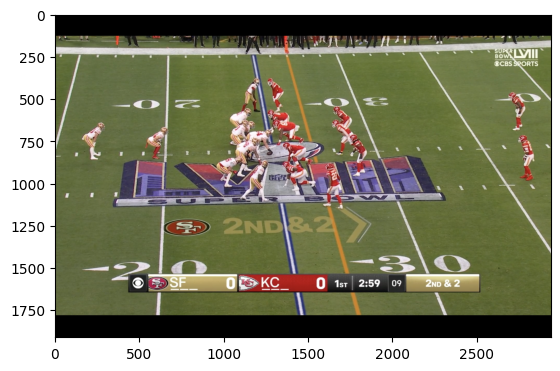

In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt

x=torchvision.io.read_image('img_1.png')
plt.imshow(x.permute(1, 2, 0))

In [5]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

In [6]:
# resnet
img = x[:3]

# initialize model with best weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights = weights, box_score_thresh = 0.8)
model.eval()

# initialize inference transforms
preprocess = weights.transforms()

# apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# use model and visualize prediction
prediction = model(batch)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:01<00:00, 124MB/s]


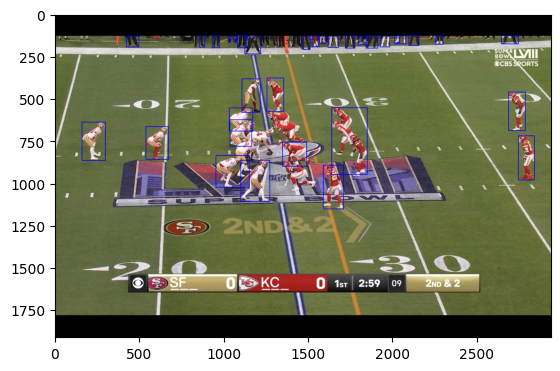

In [ ]:
import matplotlib.font_manager as fm
box = draw_bounding_boxes(img, boxes=prediction[0]["boxes"],
                          colors="blue",
                          width=4)

plt.imshow(box.permute(1, 2, 0))
plt.savefig('output_plot.png', dpi=300)
plt.show()

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zEq7bZFwr1BHWEiJ2192")
project = rf.workspace("project-1tb2x").project("project-u8hk9")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...
/content/Project-1


In [ ]:
%cat {dataset.location}/data.yaml

names:
- Team A
- Team-B
nc: 2
roboflow:
  license: CC BY 4.0
  project: project-u8hk9
  url: https://universe.roboflow.com/project-1tb2x/project-u8hk9/dataset/1
  version: 1
  workspace: project-1tb2x
test: ../test/images
train: Project-1/train/images
val: Project-1/valid/images


In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])



In [ ]:
from ultralytics import YOLO
model = YOLO('yolov5n.pt')

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.27M/5.27M [00:00<00:00, 58.8MB/s]


In [ ]:
type(dataset)

roboflow.core.dataset.Dataset

In [ ]:
results = model.train(data='/content/drive/Othercomputers/Mac/dsan6600/Project-1/data.yaml', epochs=3)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=/content/drive/Othercomputers/Mac/dsan6600/Project-1/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

RuntimeError: Dataset '/content/drive/Othercomputers/Mac/dsan6600/Project-1/data.yaml' error ❌ 
Dataset '/content/drive/Othercomputers/Mac/dsan6600/Project-1/data.yaml' images not found ⚠️, missing path '/content/drive/Othercomputers/Mac/dsan6600/Project-1/Project-1/valid/images'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.yaml'